In [211]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import caffe
import os
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
from pandas import Series, DataFrame
# display plots in this notebook
%matplotlib inline
# set display defaults
#plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

In [212]:
from helper import *

In [213]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '%.2f'%cm[i, j],
                 horizontalalignment="center", 
                 color="gray" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [260]:
features_name = 'baseline'
n_features = 4096
n_samples_per_fold = 1
dataset = 3

In [261]:
def load_features(video):
    with open(os.path.join('./data/ArrowDataAll', video, 'features-' + features_name + '.csv'), 'r') as f:
        X = np.loadtxt(f, delimiter = ',')
    with open(os.path.join('./data/ArrowDataAll', video, 'labels-' + features_name + '.csv'), 'r') as f:
        y = np.loadtxt(f, delimiter = ',')
    video_names_with_multitude = [video] * len(y)
    return X, y, video_names_with_multitude

In [262]:
train_list, test_list = load_list('./data', dataset = dataset)

In [263]:
X_train = np.empty((0, n_features))
y_train = np.empty(0)
video_train = []
for video in train_list:
    if train_list.index(video) % 10 == 0:
        print train_list.index(video)+1
    X, y, video_names_with_multitude = load_features(video)
    X_train = np.append(X_train, X, axis = 0)
    y_train = np.append(y_train, y, axis = 0)
    video_train.extend(video_names_with_multitude)

1
11
21
31
41
51
61
71
81
91
101
111


In [264]:
X_test = np.empty((0, n_features))
y_test = np.empty(0)
video_test = []
for video in test_list:
    if test_list.index(video) % 10 == 0:
        print test_list.index(video)+1
    X, y, video_names_with_multitude = load_features(video)
    X_test = np.append(X_test, X, axis = 0)
    y_test = np.append(y_test, y, axis = 0)
    video_test.extend(video_names_with_multitude)

1
11
21
31
41
51


## Feature importance

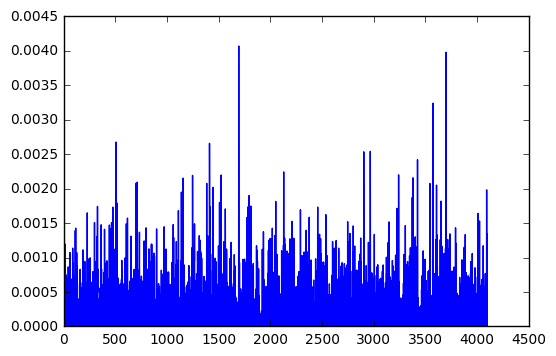

In [265]:
clf = RandomForestClassifier(n_jobs = -1, n_estimators=100)
clf.fit(X_train, y_train)
plt.plot(clf.feature_importances_)
plt.savefig('../report/figs/importance-f' + str(features_name) + '-d' + str(dataset) + '.pdf')

In [266]:
#clf = RandomForestClassifier(n_jobs=-1, n_estimators=100)
clf = SVC(C = 1, kernel = 'rbf')
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [267]:
#from sklearn.model_selection import GridSearchCV
#parameters = {'kernel':['linear'], 'C':[0.1, 1, 10, 100]}
#svc = SVC()
#clf = GridSearchCV(svc, parameters, n_jobs = -1)
#clf.fit(X_train, y_train)

In [268]:
print clf.score(X_test, y_test)

0.5375


In [269]:
y_predict = clf.predict(X_test)

In [270]:
df = DataFrame(Series(y_test))
df[1] = Series(y_predict)
df[2] = Series(video_test)
df.columns = ['true', 'predict', 'video']

In [271]:
fold = [['A']*n_samples_per_fold + ['B']*n_samples_per_fold + ['C']*n_samples_per_fold + ['D']*n_samples_per_fold]*60

In [272]:
import itertools
fold = list(itertools.chain(*fold))
df['fold'] = Series(fold)

In [273]:
df

,true,predict,video,fold
0,1.0,1.0,F_y6YNedovdjI,A
1,1.0,1.0,F_y6YNedovdjI,B
2,0.0,0.0,F_y6YNedovdjI,C
3,0.0,1.0,F_y6YNedovdjI,D
4,1.0,0.0,F_uxkuLHrMLMM,A
5,1.0,1.0,F_uxkuLHrMLMM,B
6,0.0,0.0,F_uxkuLHrMLMM,C
7,0.0,0.0,F_uxkuLHrMLMM,D
8,1.0,0.0,F_sRCQjNWXEKM,A
9,1.0,0.0,F_sRCQjNWXEKM,B


In [274]:
dfg = df.groupby(['video', 'fold']).mean().unstack()

In [275]:
dfg

true                predict               
fold             A    B    C    D       A    B    C    D
video                                                   
B1T22VWizYLOA  0.0  0.0  1.0  1.0     0.0  0.0  1.0  1.0
B1Y2KN-ZgfZAM  0.0  0.0  1.0  1.0     0.0  0.0  1.0  1.0
B1hVUP9r0PMVs  0.0  0.0  1.0  1.0     1.0  1.0  0.0  0.0
B1vveolbpbm3E  0.0  0.0  1.0  1.0     1.0  1.0  1.0  1.0
B201TL9bUWr6I  0.0  0.0  1.0  1.0     1.0  1.0  1.0  1.0
B3X6jprOZ29wY  0.0  0.0  1.0  1.0     1.0  0.0  1.0  1.0
B4X6jprOZ29wY  0.0  0.0  1.0  1.0     1.0  1.0  1.0  1.0
B501TL9bUWr6I  0.0  0.0  1.0  1.0     0.0  0.0  1.0  1.0
F_15vIHoDwJG4  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_1NvU8WG9bg0  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_20XsaHpRQC8  1.0  1.0  0.0  0.0     0.0  0.0  0.0  1.0
F_5f8rmrF_mDI  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0
F_8FFxdUPi6rY  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_8TOTUOFMjuo  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0
F_9oETTQVGP1w  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_AcF1AMace2s  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_CFcDjqyTTuQ  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_CoJLjtzmbxI  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_D3ylhYOOuzk  1.0  1.0  0.0  0.0     1.0  1.0  1.0  0.0
F_F9fEEqjuzcI  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0
F_FKanE2sgW5I  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_FUKM8yFYvMg  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_FcicUWGj0c0  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0
F_HWpgOjAvUps  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_He-BFGBOQvI  1.0  1.0  0.0  0.0     0.0  0.0  1.0  0.0
F_IWDJBCL9q7I  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_Ks1kArpMj-o  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_LICDb8nM5rs  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_LO3gooVb400  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0
F_LwNuuJ85mC4  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_OBO19vCHtic  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0
F_PZrW49YMeDs  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0
F_WeI44K6kCRU  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_XCzAvgTFOp4  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F__aAMwBO1Tco  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0
F__tSqpfHWYi4  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_aHrn3-Cb3iM  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_bNxY4yKBHeg  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_bg1pjsCTIRc  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0
F_bzmzjfQRA-A  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_dP15zlyra3c  1.0  1.0  0.0  0.0     1.0  1.0  0.0  1.0
F_eV23yzJIPWo  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_ef0cNdb3XjI  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0
F_fFVT_CtL62M  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_gTlPFG6_Ly8  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_iDjxOXkgHBc  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_j2WtUcsfR5s  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0
F_l87MRRjpkxM  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_m4la6X_IkGs  1.0  1.0  0.0  0.0     1.0  1.0  1.0  0.0
F_raCFAL5CZEU  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0
F_rcp4eckcBoU  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0
F_rpzY8gP_jkQ  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_sRCQjNWXEKM  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_uLgfDvgp-D4  1.0  1.0  0.0  0.0     0.0  0.0  1.0  0.0
F_uxkuLHrMLMM  1.0  1.0  0.0  0.0     0.0  1.0  0.0  0.0
F_wUhoKHzau8g  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0
F_wrOjBRqPHjU  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0
F_x2H7zcqjplc  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0
F_y-MkdkUB8pY  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0
F_y6YNedovdjI  1.0  1.0  0.0  0.0     1.0  1.0  0.0  1.0

In [276]:
dfg['gt'] = dfg.apply(lambda x: (x['true']['A'] + x['true']['B']- x['true']['C']-x['true']['D']) > 0, axis = 1)
dfg['my'] = dfg.apply(lambda x: (x['predict']['A'] + x['predict']['B']- x['predict']['C']-x['predict']['D'])>=0, axis = 1)

In [277]:
dfg

true                predict                    gt     my
fold             A    B    C    D       A    B    C    D              
video                                                                 
B1T22VWizYLOA  0.0  0.0  1.0  1.0     0.0  0.0  1.0  1.0  False  False
B1Y2KN-ZgfZAM  0.0  0.0  1.0  1.0     0.0  0.0  1.0  1.0  False  False
B1hVUP9r0PMVs  0.0  0.0  1.0  1.0     1.0  1.0  0.0  0.0  False   True
B1vveolbpbm3E  0.0  0.0  1.0  1.0     1.0  1.0  1.0  1.0  False   True
B201TL9bUWr6I  0.0  0.0  1.0  1.0     1.0  1.0  1.0  1.0  False   True
B3X6jprOZ29wY  0.0  0.0  1.0  1.0     1.0  0.0  1.0  1.0  False  False
B4X6jprOZ29wY  0.0  0.0  1.0  1.0     1.0  1.0  1.0  1.0  False   True
B501TL9bUWr6I  0.0  0.0  1.0  1.0     0.0  0.0  1.0  1.0  False  False
F_15vIHoDwJG4  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_1NvU8WG9bg0  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_20XsaHpRQC8  1.0  1.0  0.0  0.0     0.0  0.0  0.0  1.0   True  False
F_5f8rmrF_mDI  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0   True  False
F_8FFxdUPi6rY  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_8TOTUOFMjuo  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0   True  False
F_9oETTQVGP1w  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_AcF1AMace2s  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_CFcDjqyTTuQ  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_CoJLjtzmbxI  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_D3ylhYOOuzk  1.0  1.0  0.0  0.0     1.0  1.0  1.0  0.0   True   True
F_F9fEEqjuzcI  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0   True   True
F_FKanE2sgW5I  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_FUKM8yFYvMg  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_FcicUWGj0c0  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0   True  False
F_HWpgOjAvUps  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_He-BFGBOQvI  1.0  1.0  0.0  0.0     0.0  0.0  1.0  0.0   True  False
F_IWDJBCL9q7I  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_Ks1kArpMj-o  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_LICDb8nM5rs  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_LO3gooVb400  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0   True   True
F_LwNuuJ85mC4  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_OBO19vCHtic  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0   True  False
F_PZrW49YMeDs  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0   True  False
F_WeI44K6kCRU  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_XCzAvgTFOp4  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F__aAMwBO1Tco  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0   True   True
F__tSqpfHWYi4  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_aHrn3-Cb3iM  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_bNxY4yKBHeg  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_bg1pjsCTIRc  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0   True   True
F_bzmzjfQRA-A  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_dP15zlyra3c  1.0  1.0  0.0  0.0     1.0  1.0  0.0  1.0   True   True
F_eV23yzJIPWo  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_ef0cNdb3XjI  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0   True   True
F_fFVT_CtL62M  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_gTlPFG6_Ly8  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_iDjxOXkgHBc  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_j2WtUcsfR5s  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True
F_l87MRRjpkxM  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_m4la6X_IkGs  1.0  1.0  0.0  0.0     1.0  1.0  1.0  0.0   True   True
F_raCFAL5CZEU  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0   True  False
F_rcp4eckcBoU  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0   True   True
F_rpzY8gP_jkQ  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_sRCQjNWXEKM  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True
F_uLgfDvgp-D4  1.0  1.0  0.0  0.0     

In [278]:
dfg['good'] = dfg['gt'] == dfg['my']

In [279]:
dfg

true                predict                    gt     my   good
fold             A    B    C    D       A    B    C    D                     
video                                                                        
B1T22VWizYLOA  0.0  0.0  1.0  1.0     0.0  0.0  1.0  1.0  False  False   True
B1Y2KN-ZgfZAM  0.0  0.0  1.0  1.0     0.0  0.0  1.0  1.0  False  False   True
B1hVUP9r0PMVs  0.0  0.0  1.0  1.0     1.0  1.0  0.0  0.0  False   True  False
B1vveolbpbm3E  0.0  0.0  1.0  1.0     1.0  1.0  1.0  1.0  False   True  False
B201TL9bUWr6I  0.0  0.0  1.0  1.0     1.0  1.0  1.0  1.0  False   True  False
B3X6jprOZ29wY  0.0  0.0  1.0  1.0     1.0  0.0  1.0  1.0  False  False   True
B4X6jprOZ29wY  0.0  0.0  1.0  1.0     1.0  1.0  1.0  1.0  False   True  False
B501TL9bUWr6I  0.0  0.0  1.0  1.0     0.0  0.0  1.0  1.0  False  False   True
F_15vIHoDwJG4  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_1NvU8WG9bg0  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_20XsaHpRQC8  1.0  1.0  0.0  0.0     0.0  0.0  0.0  1.0   True  False  False
F_5f8rmrF_mDI  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0   True  False  False
F_8FFxdUPi6rY  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_8TOTUOFMjuo  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0   True  False  False
F_9oETTQVGP1w  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_AcF1AMace2s  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_CFcDjqyTTuQ  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_CoJLjtzmbxI  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_D3ylhYOOuzk  1.0  1.0  0.0  0.0     1.0  1.0  1.0  0.0   True   True   True
F_F9fEEqjuzcI  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0   True   True   True
F_FKanE2sgW5I  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_FUKM8yFYvMg  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_FcicUWGj0c0  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0   True  False  False
F_HWpgOjAvUps  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_He-BFGBOQvI  1.0  1.0  0.0  0.0     0.0  0.0  1.0  0.0   True  False  False
F_IWDJBCL9q7I  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_Ks1kArpMj-o  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_LICDb8nM5rs  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_LO3gooVb400  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0   True   True   True
F_LwNuuJ85mC4  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_OBO19vCHtic  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0   True  False  False
F_PZrW49YMeDs  1.0  1.0  0.0  0.0     0.0  0.0  1.0  1.0   True  False  False
F_WeI44K6kCRU  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_XCzAvgTFOp4  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F__aAMwBO1Tco  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0   True   True   True
F__tSqpfHWYi4  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_aHrn3-Cb3iM  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_bNxY4yKBHeg  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_bg1pjsCTIRc  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0   True   True   True
F_bzmzjfQRA-A  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_dP15zlyra3c  1.0  1.0  0.0  0.0     1.0  1.0  0.0  1.0   True   True   True
F_eV23yzJIPWo  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_ef0cNdb3XjI  1.0  1.0  0.0  0.0     1.0  1.0  0.0  0.0   True   True   True
F_fFVT_CtL62M  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_gTlPFG6_Ly8  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_iDjxOXkgHBc  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_j2WtUcsfR5s  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0   True   True   True
F_l87MRRjpkxM  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0   True   True   True
F_m4la6X_IkGs  1.0  1.0  0.0  0.0   

In [280]:
dfg['good'].mean()

0.76666666666666672

In [281]:
cm = confusion_matrix(dfg['gt'], dfg['my'])

Normalized confusion matrix
[[ 0.5         0.5       ]
 [ 0.19230769  0.80769231]]


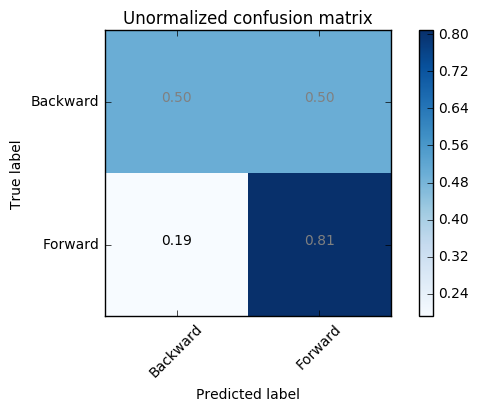

In [282]:
plot_confusion_matrix(cm, classes=['Backward', 'Forward'], normalize=True,
                      title='Unormalized confusion matrix')
plt.savefig('../report/figs/cm-' + str(features_name) + '-d' + str(dataset) + '.pdf')